In [ ]:
library(Seurat)
library(limma)
library(ggplot2)
library(patchwork)
library(edgeR)
library(statmod)
library(speckle)
library(ggpubr)
library(clustree)
library(DESeq2)
library(ggrepel)
library(dplyr)
library(pheatmap)

Computing nearest neighbor graph

Computing SNN



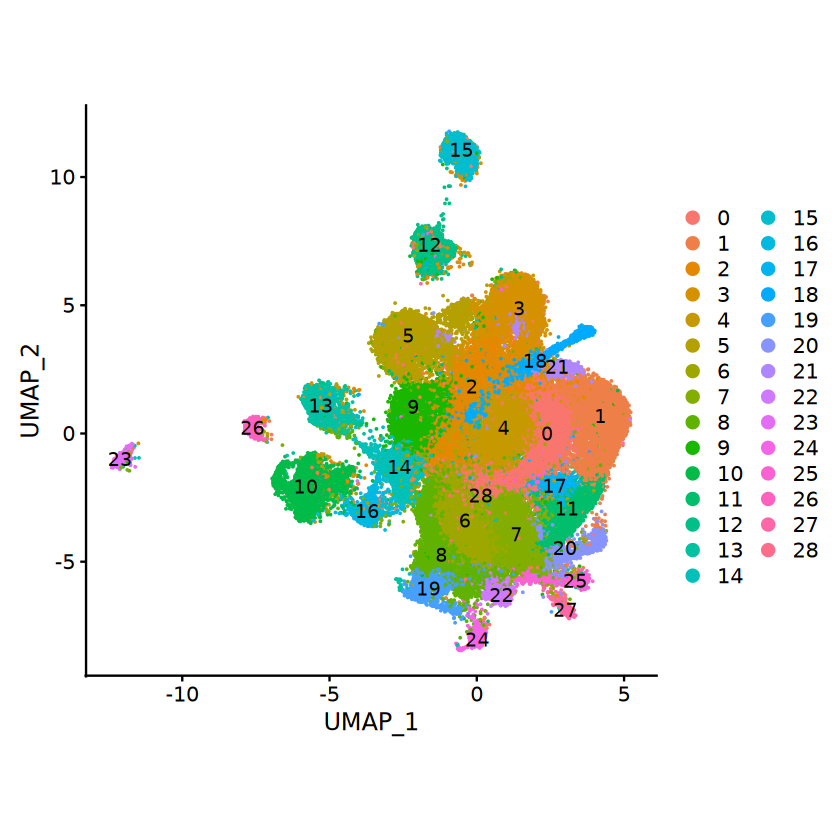

In [3]:
data <- readRDS("/data/ZhanglabShare/Nhlh2_progject/Nhlh2.neuron.v2.91479cells.rds")
data <- FindNeighbors(data,dims = 1:40)
data <- FindClusters(object = data, resolution = 0.8,verbose = FALSE)
DimPlot(data,label = T)+theme(aspect.ratio = 1)

In [4]:
female <- subset(data, sex=="Female")

In [16]:
female_10 = subset(female,integrated_snn_res.0.8==c(10))

In [20]:
female_10 = SetIdent(female_10,value = 'treatment')
DefaultAssay(female_10)="RNA"

In [21]:
female_10_markers = FindAllMarkers(female_10,logfc.threshold = 0.2)

Calculating cluster CKO

Calculating cluster WT



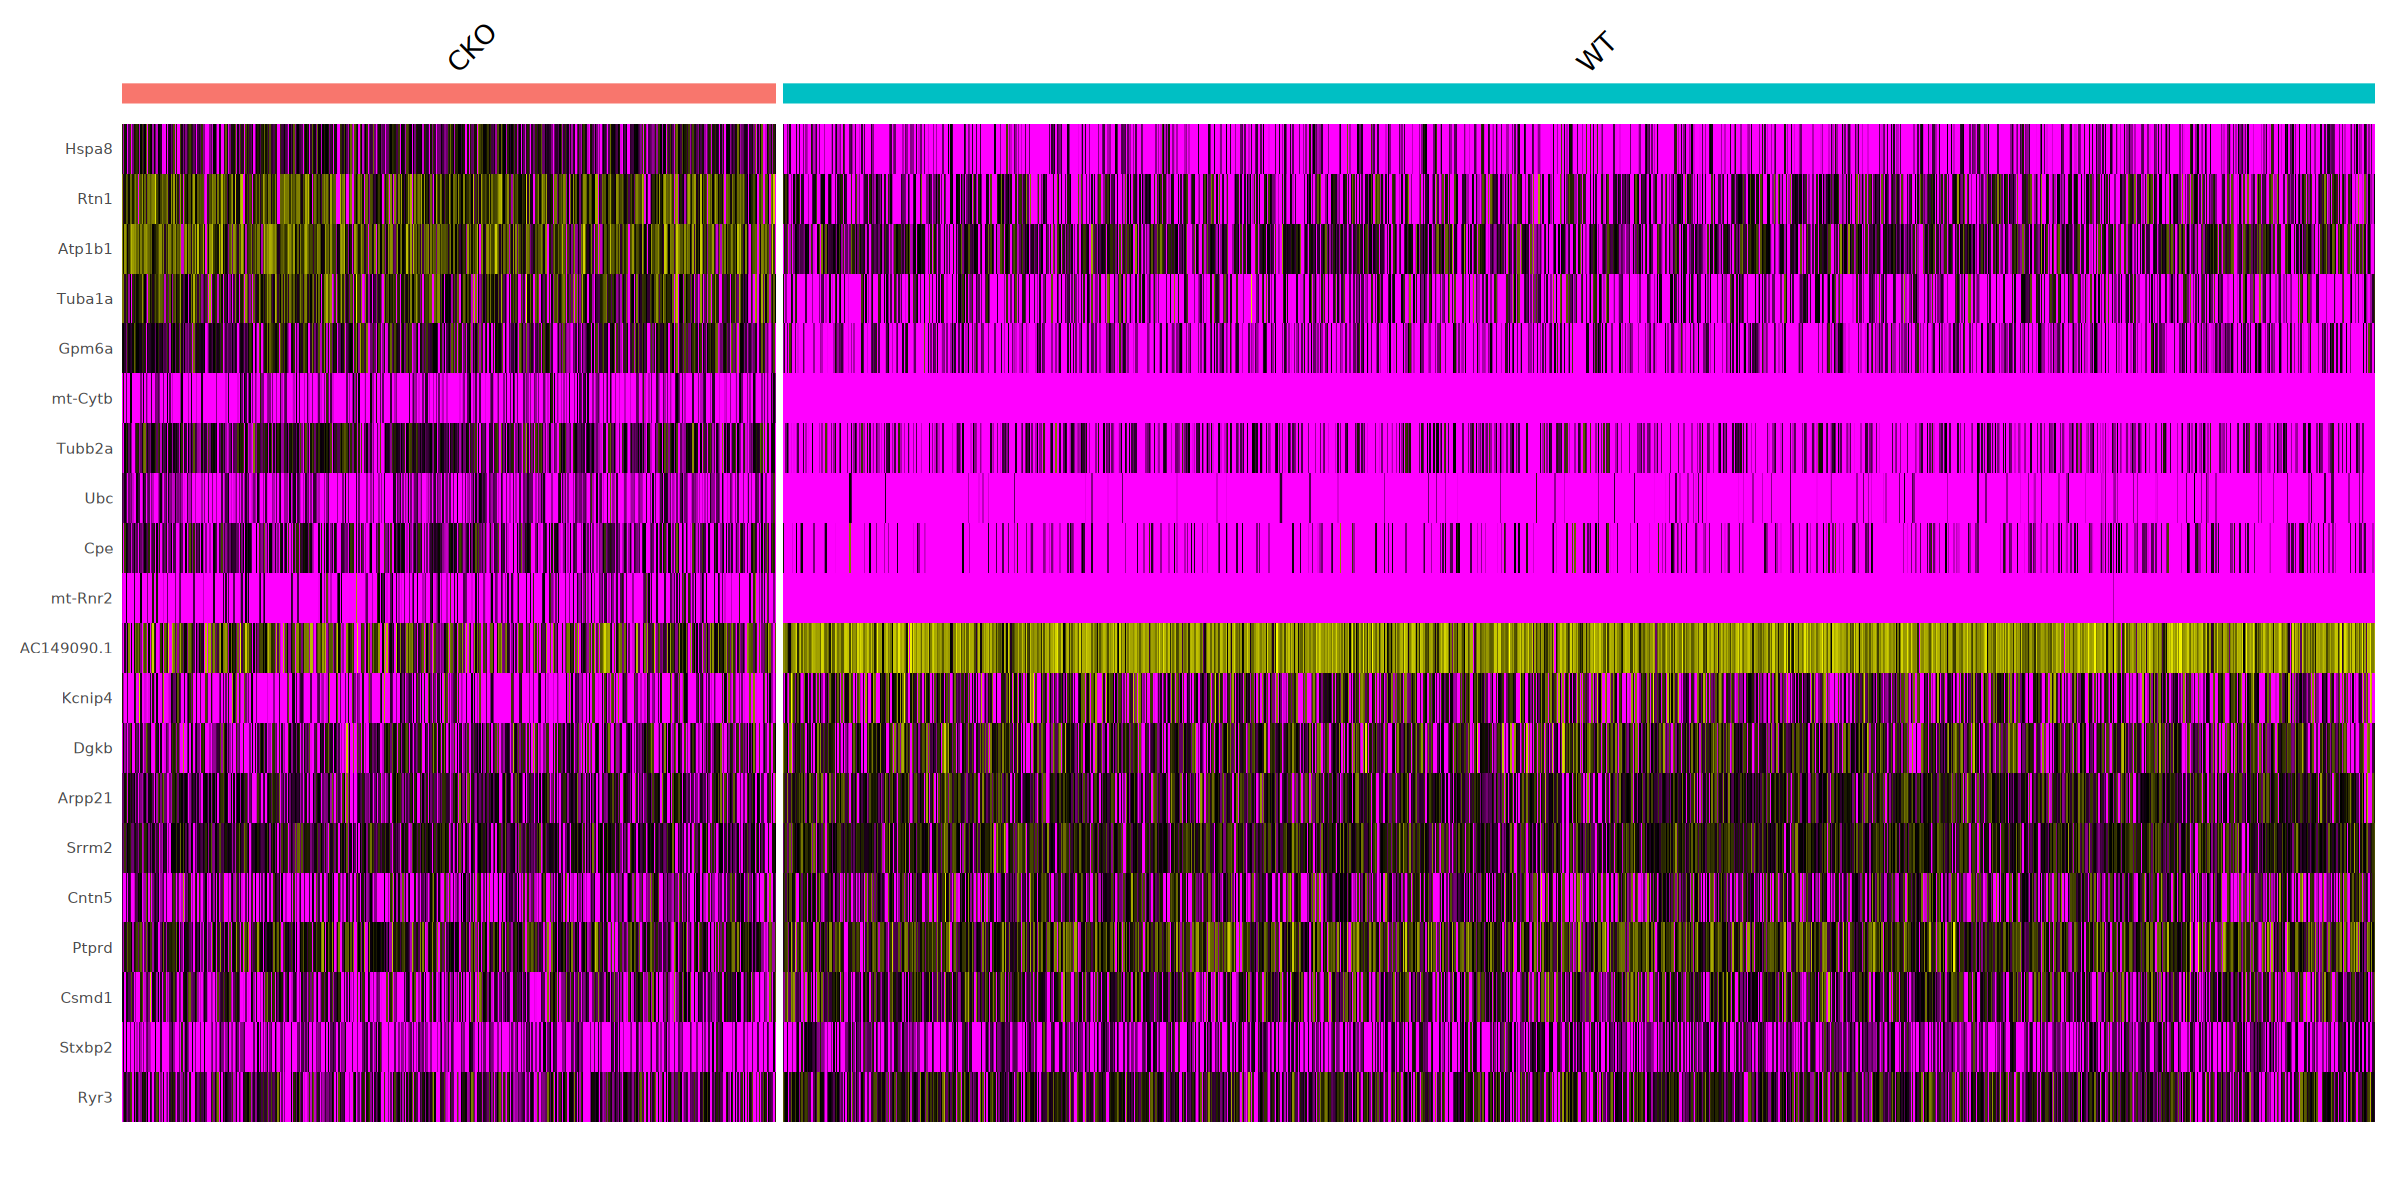

In [69]:
 female_10_markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > 0.5) %>%
  slice_head(n = 10) %>%
  ungroup() -> top20
options(repr.plot.width=20, repr.plot.height=10)
DoHeatmap(female_10, features = c(top20$gene),slot = 'data') + NoLegend()

Warning message:
“The counts layer for the integrated assay is empty. Skipping assay.”
Centering and scaling data matrix

When using repel, set xnudge and ynudge to 0 for optimal results



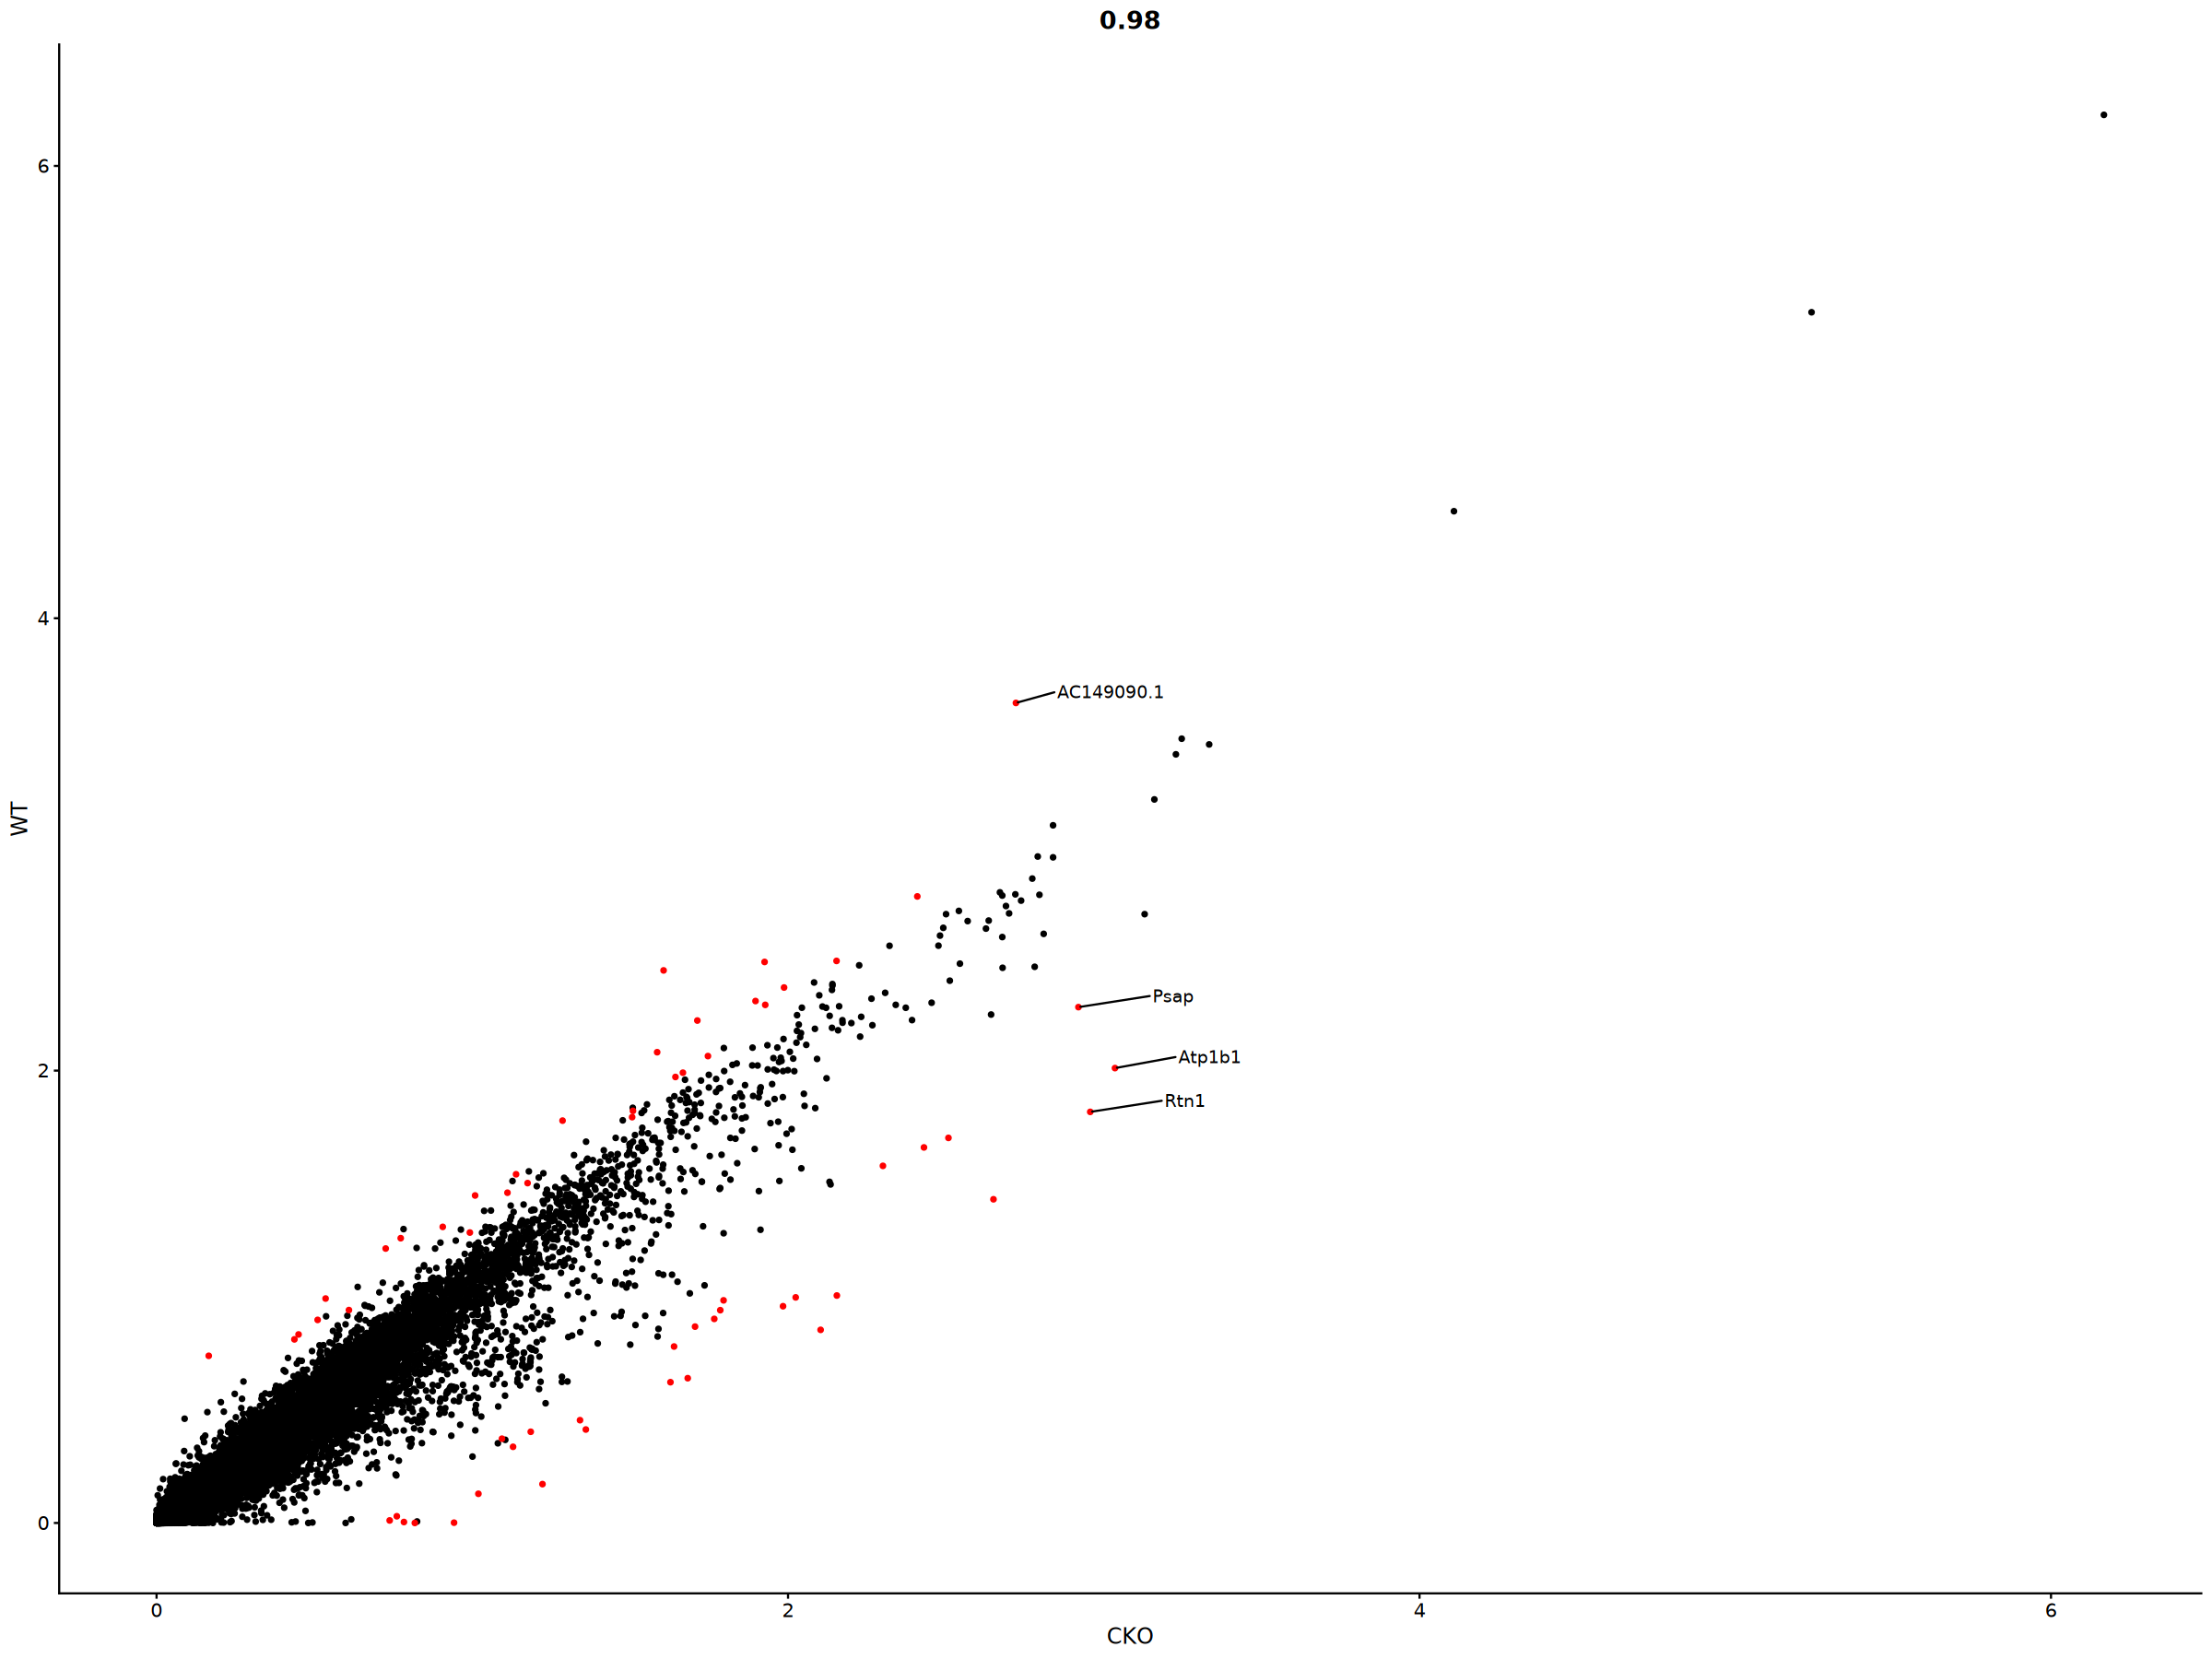

In [57]:
aggregate_female <- AggregateExpression(female_10, group.by = c("treatment"), return.seurat = TRUE)

p1 <- CellScatter(aggregate_female,cell1 = 'CKO',cell2 = 'WT',highlight = top20$gene)
p2 <- LabelPoints(plot = p1, points = c("Rtn1","Atp1b1","AC149090.1",'Psap'), repel = TRUE)
p2

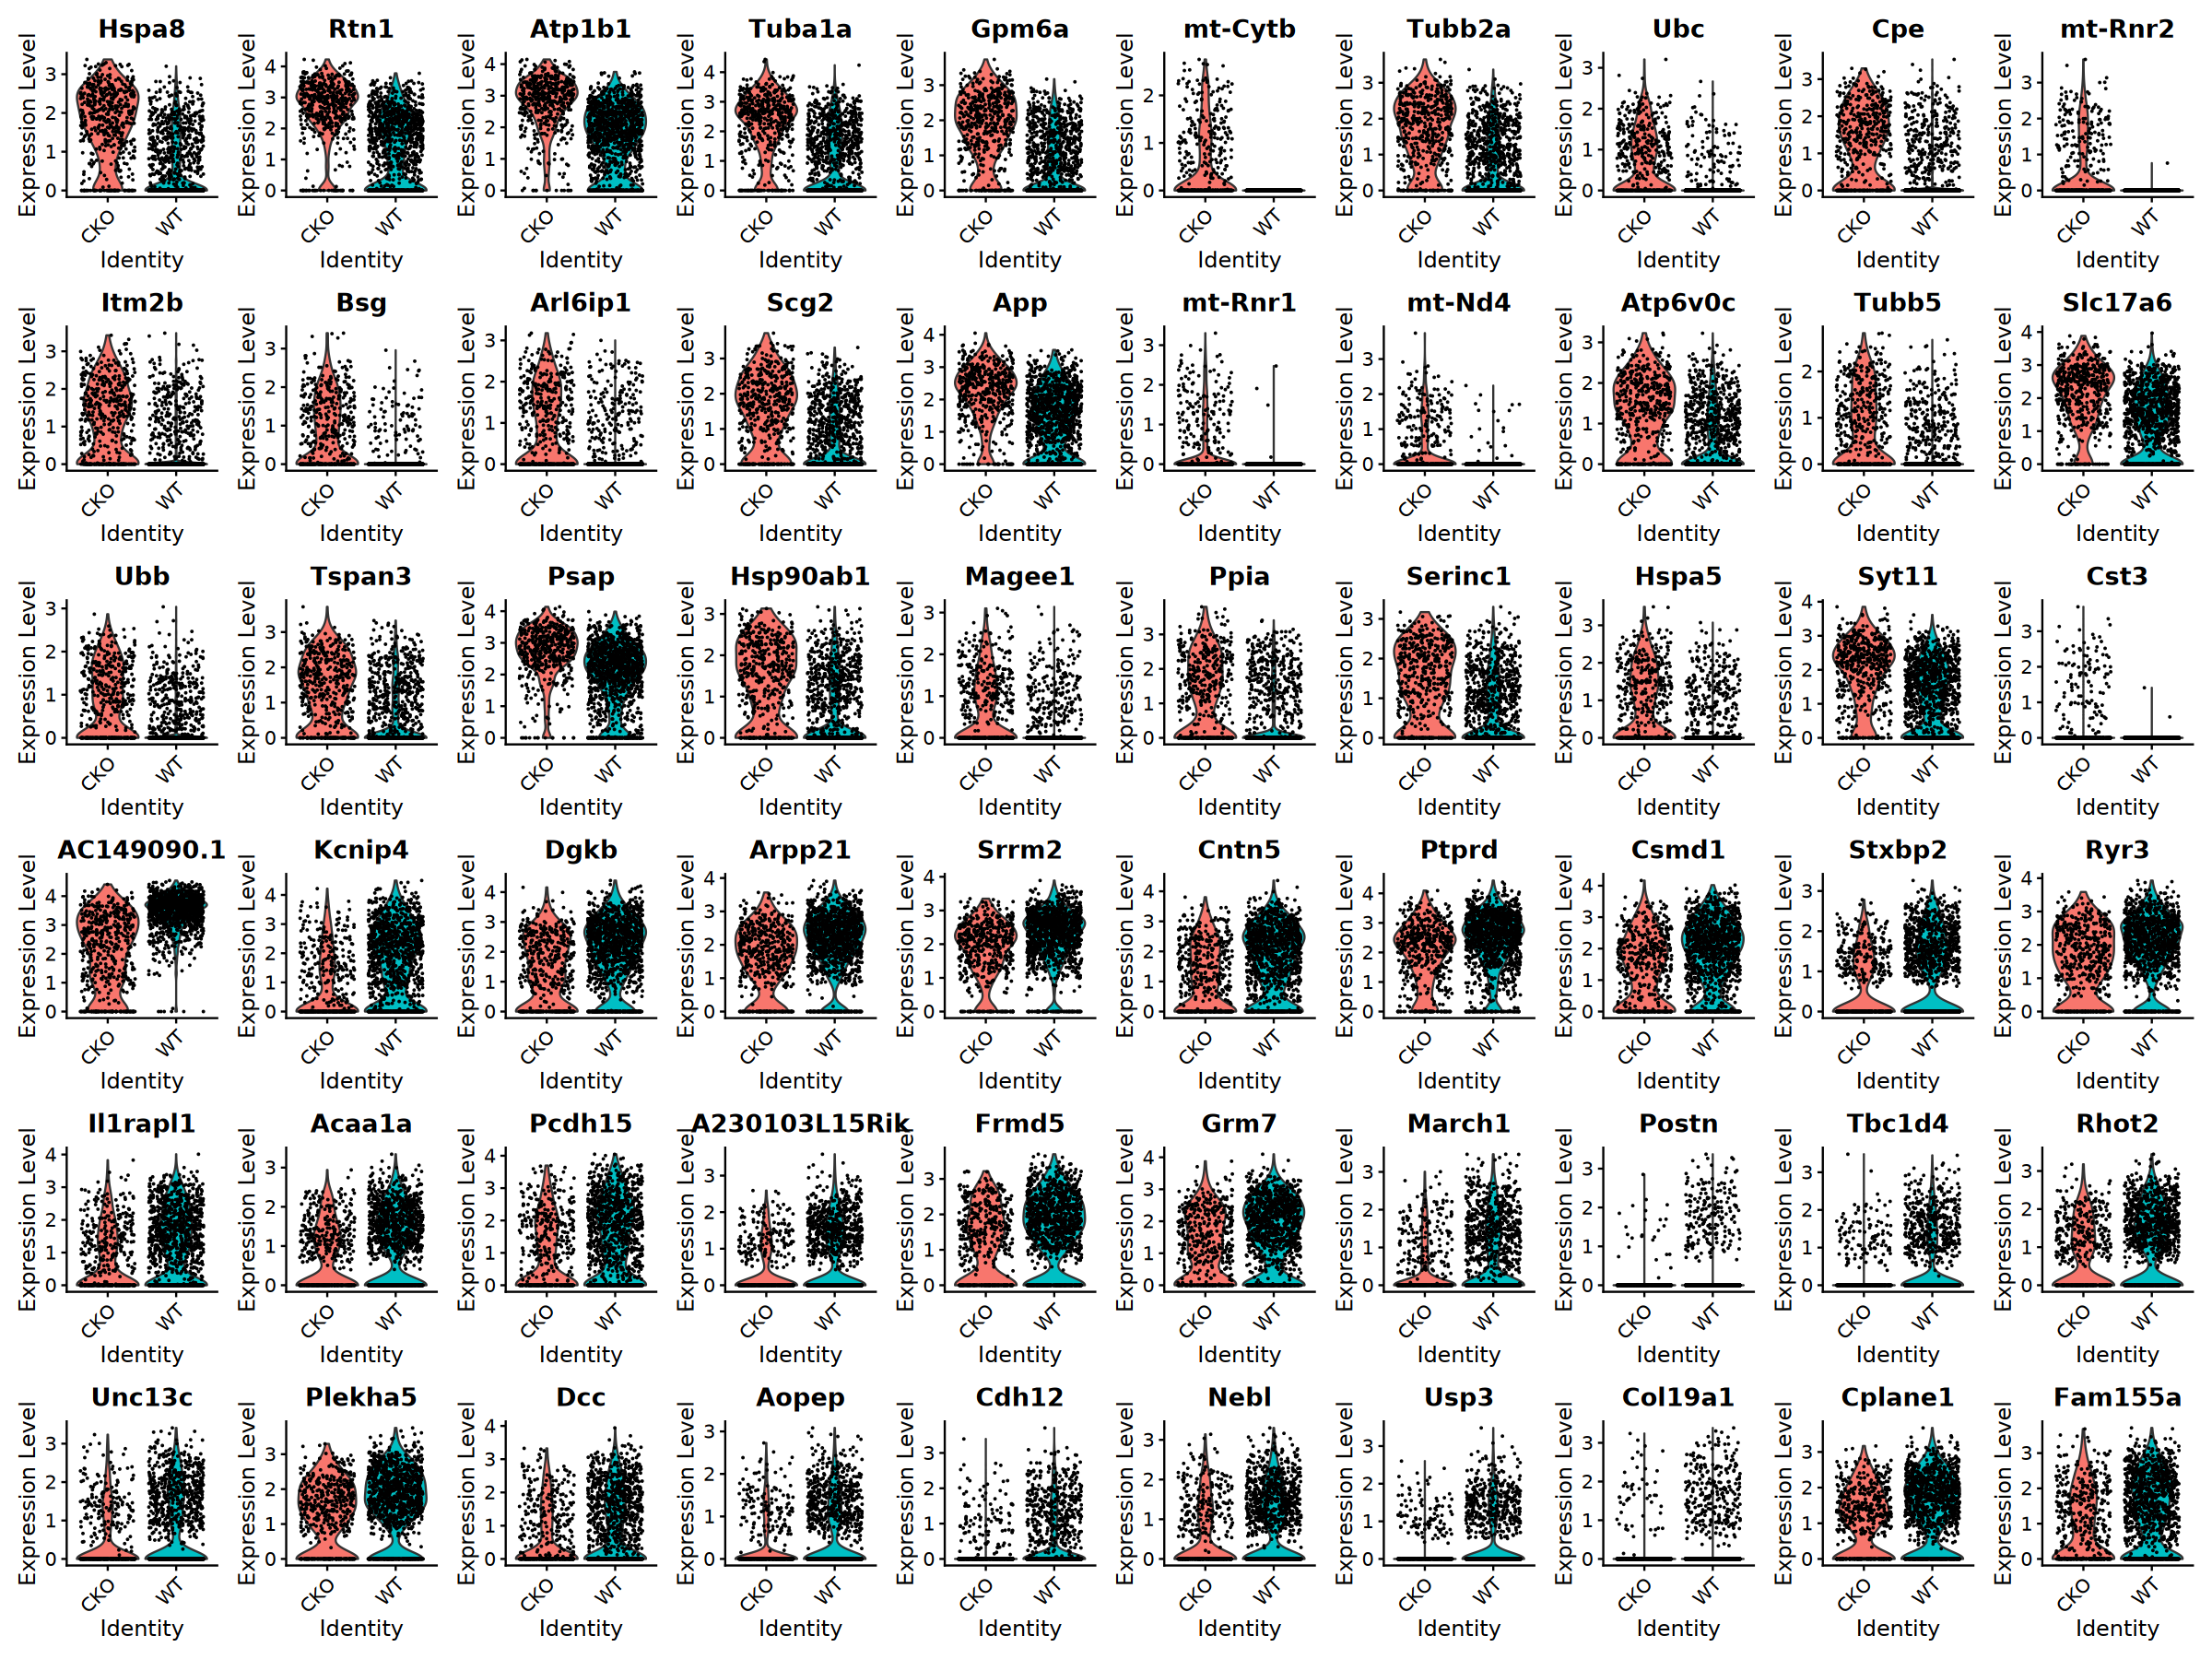

In [58]:
VlnPlot(female_10, features = top20$gene,ncol = 10)

In [26]:
female_23 = subset(female,integrated_snn_res.0.8==c(23))

In [27]:
female_23 = SetIdent(female_23,value = 'treatment')
DefaultAssay(female_23)= "RNA"

In [66]:
female_23_markers = FindAllMarkers(female_23,logfc.threshold = 0.1)

Calculating cluster CKO

Calculating cluster WT



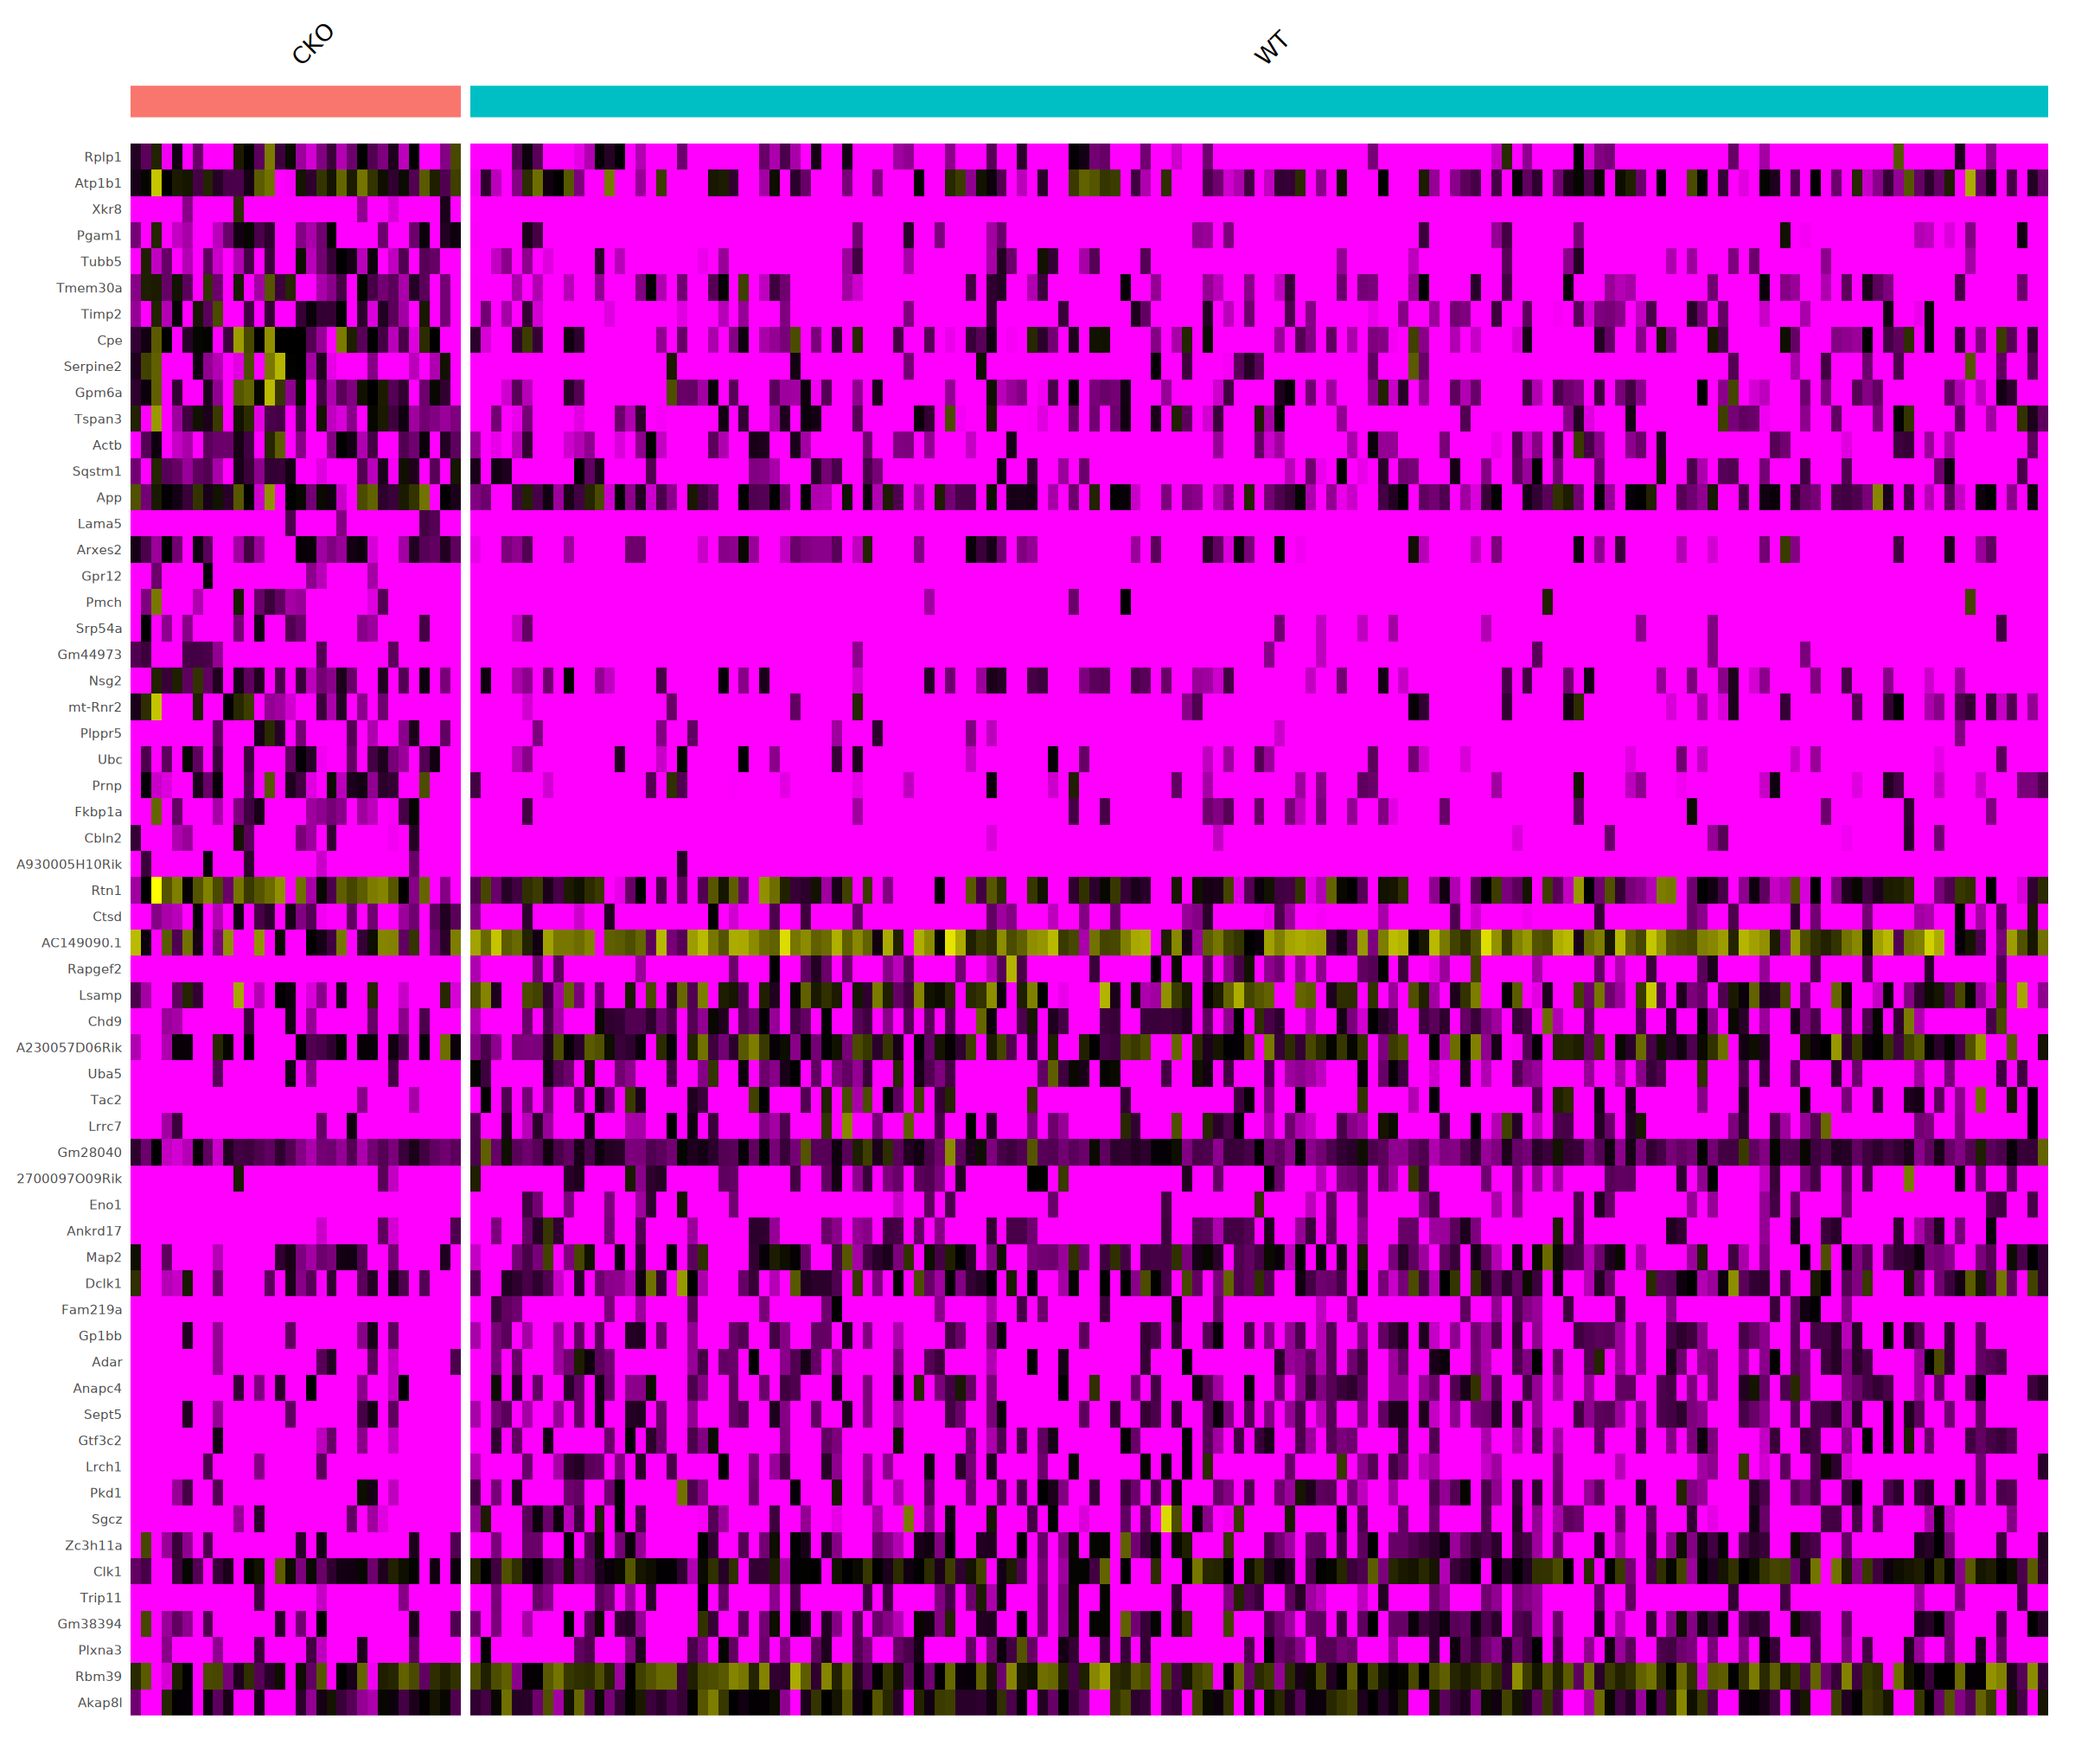

In [68]:
female_23_markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > 0.5) %>%
  slice_head(n = 30) %>%
  ungroup() -> show
DoHeatmap(female_23, features = c(show$gene),slot = 'data') + NoLegend()

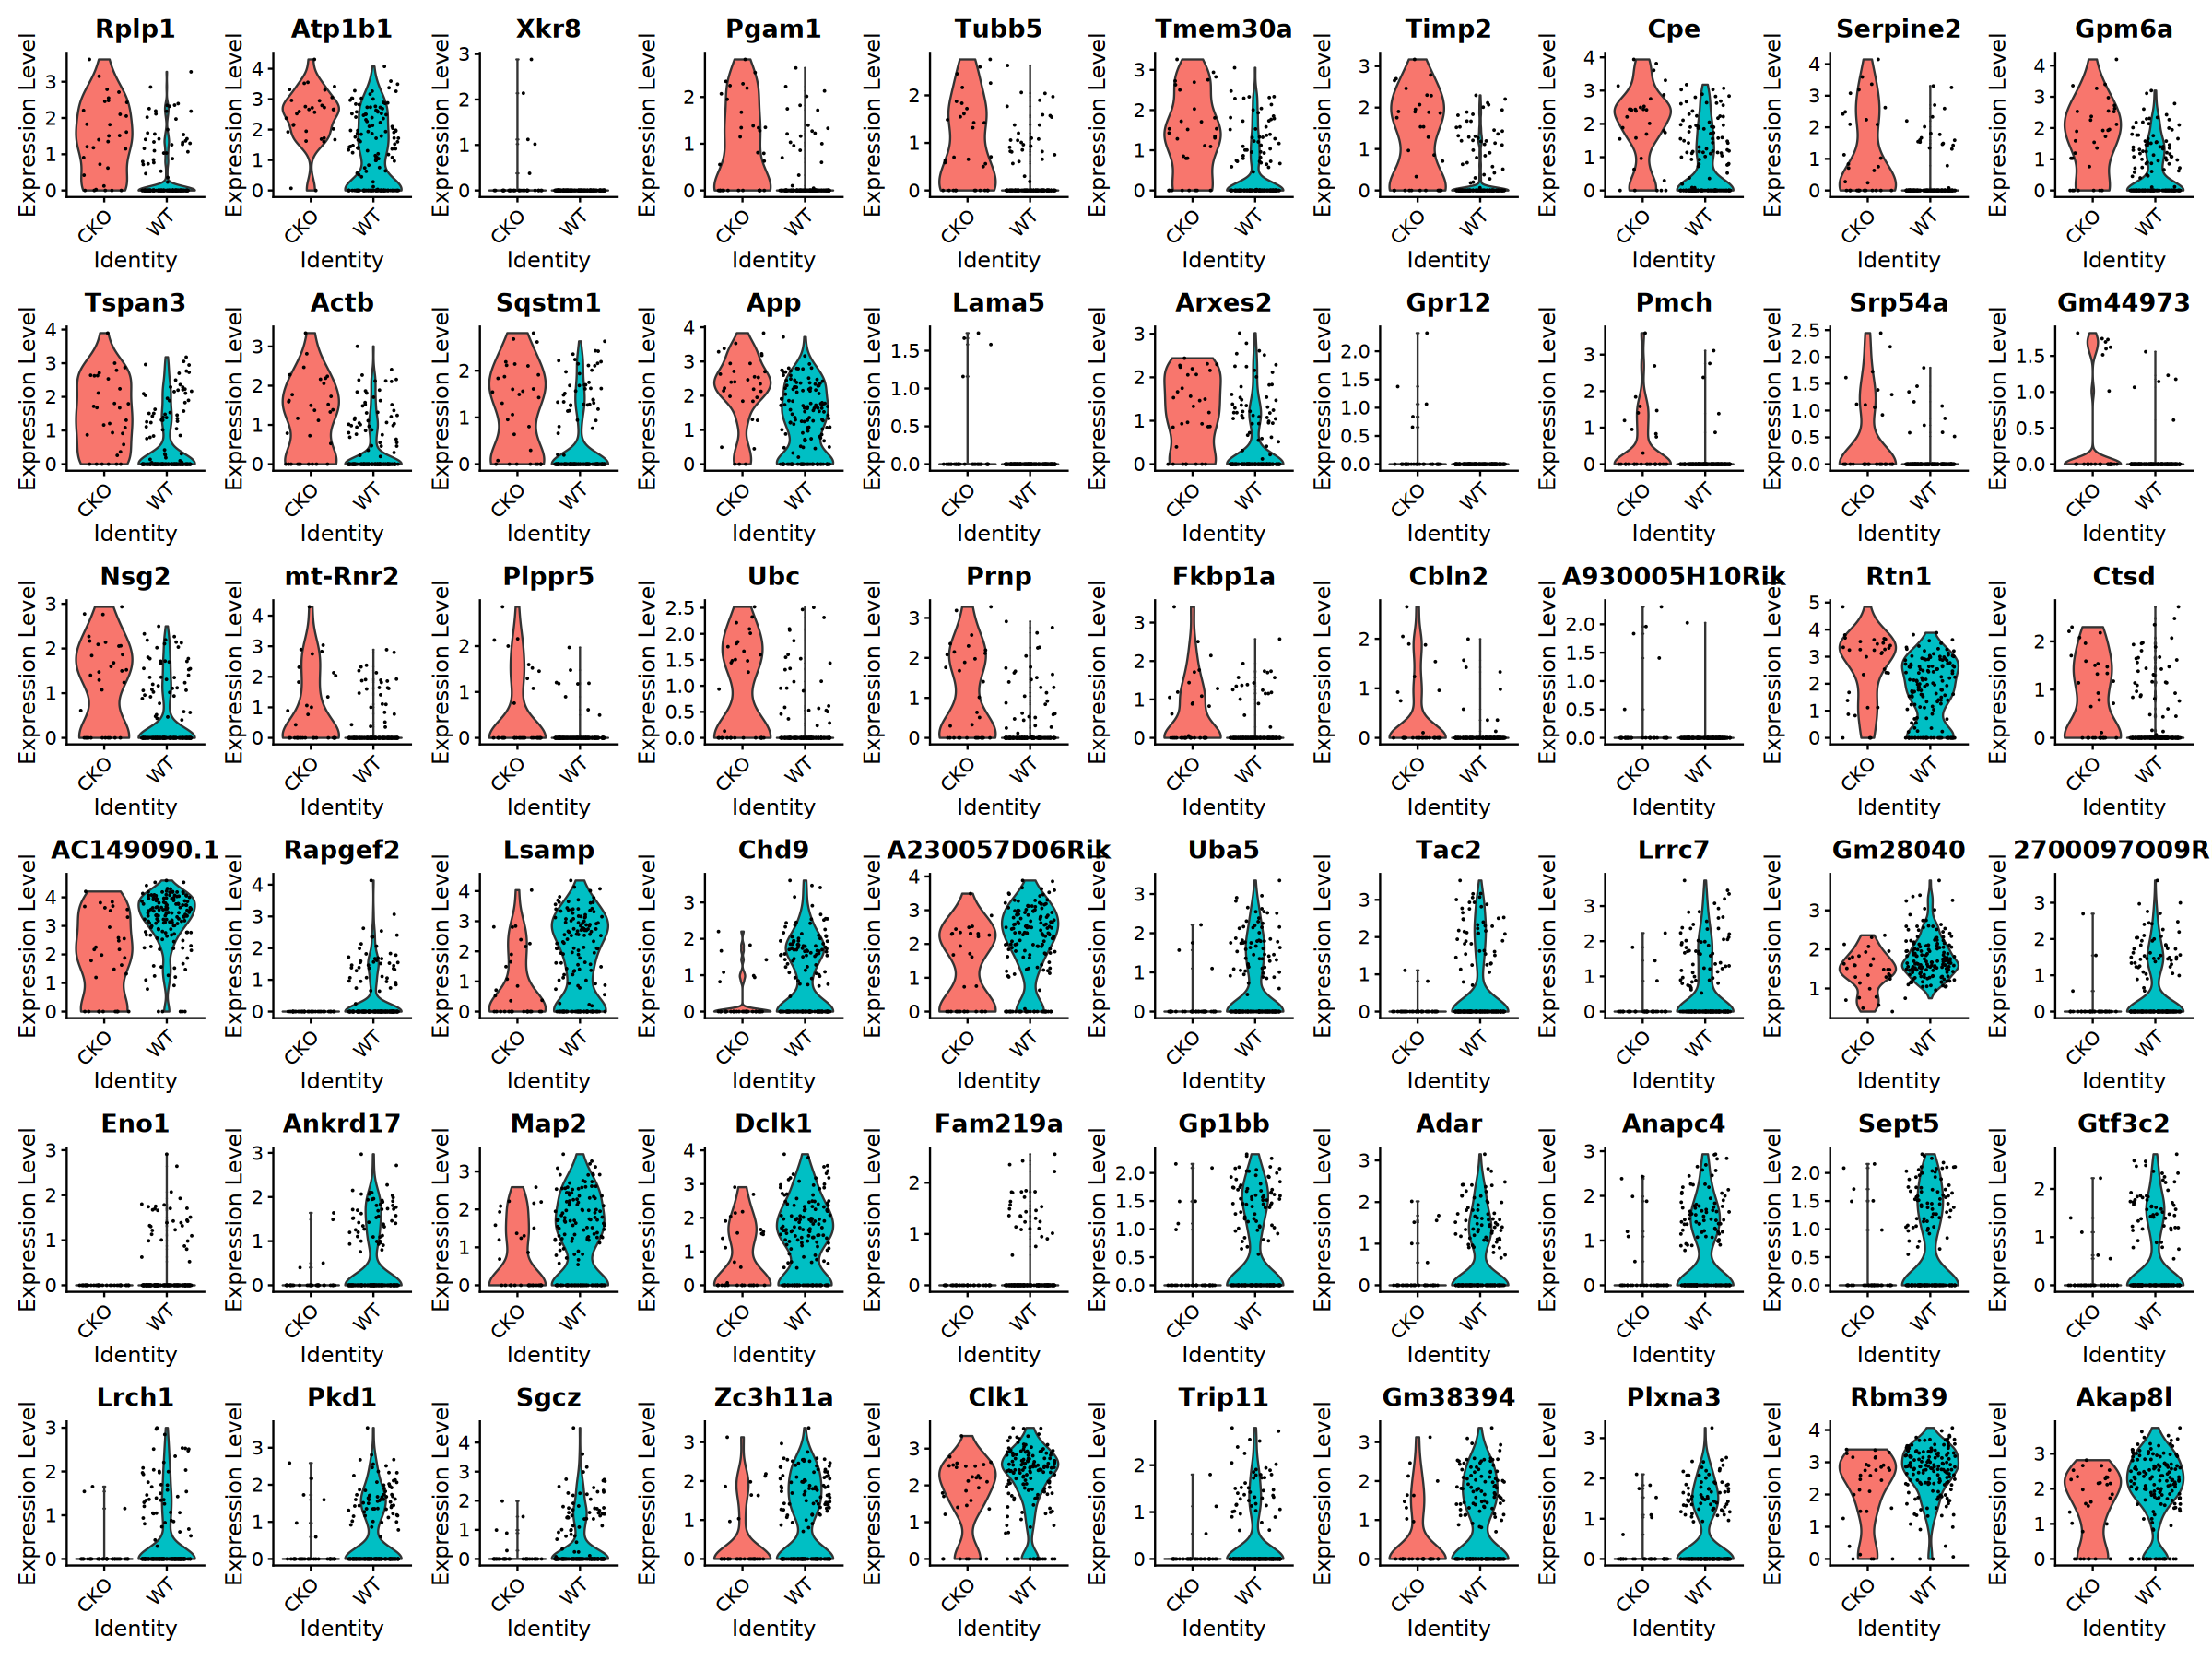

In [53]:
VlnPlot(female_23, features = show$gene,ncol = 10)

Warning message:
“The counts layer for the integrated assay is empty. Skipping assay.”
Centering and scaling data matrix

When using repel, set xnudge and ynudge to 0 for optimal results



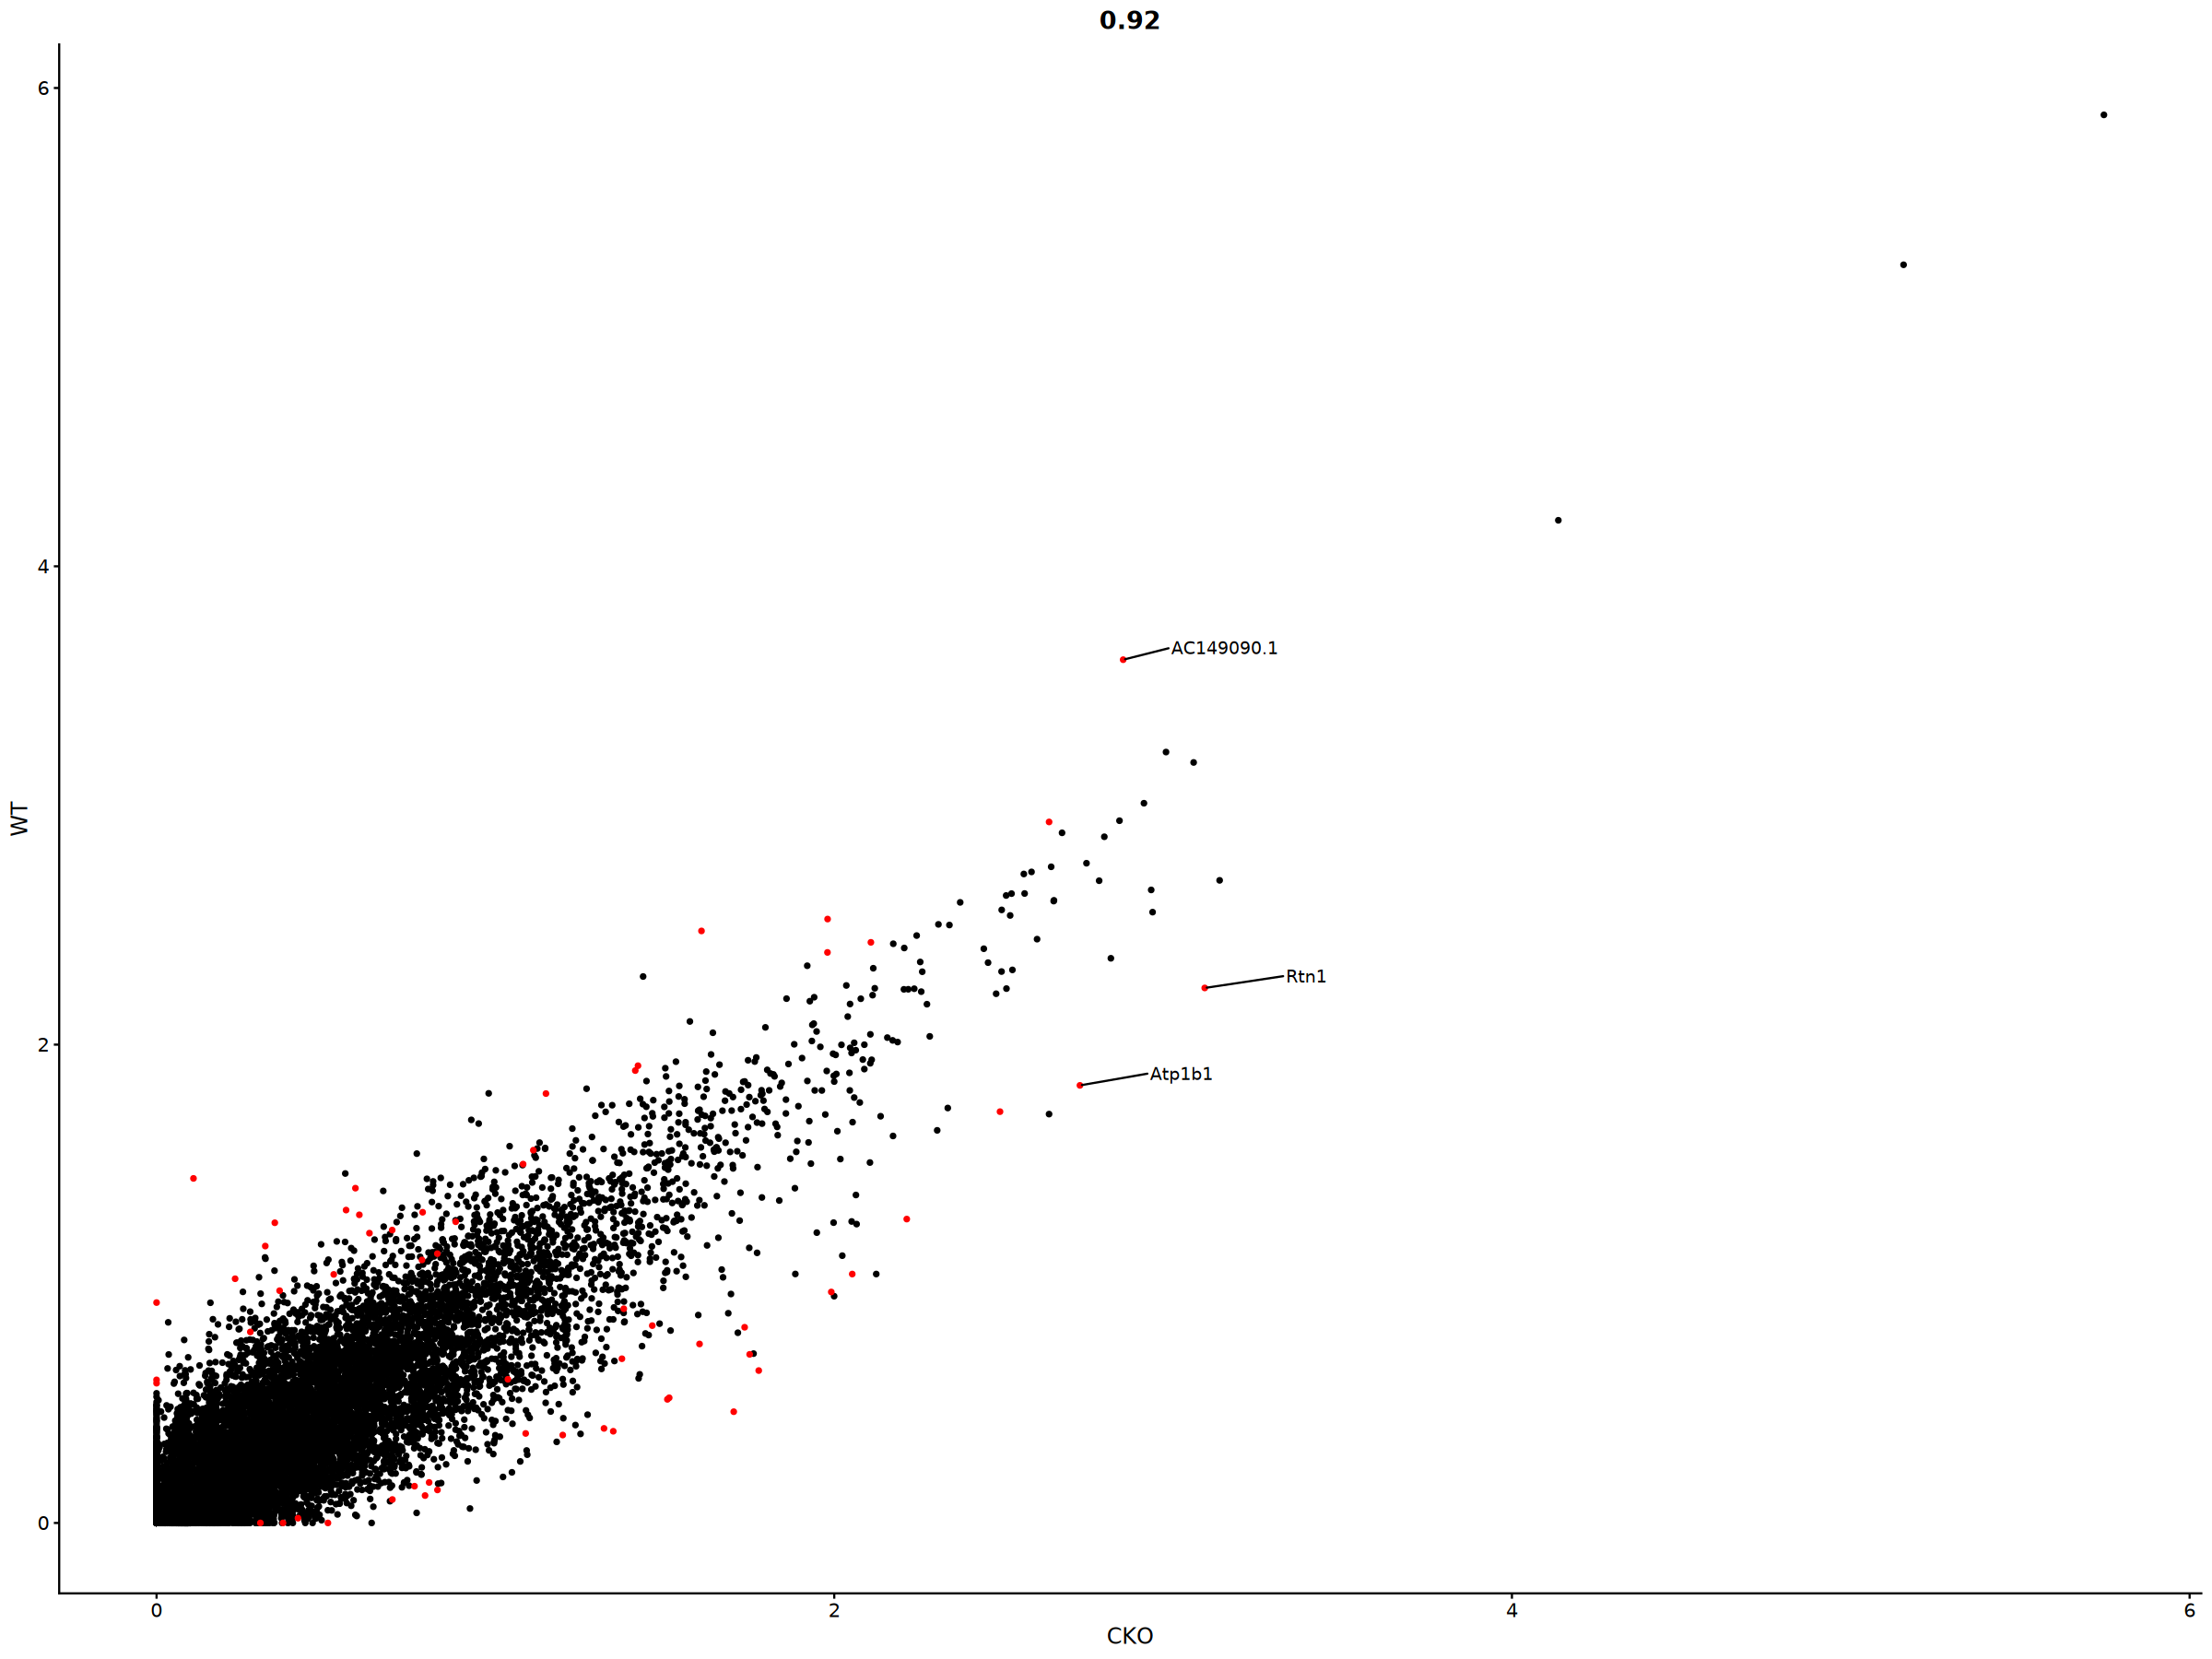

In [52]:
aggregate_23<- AggregateExpression(female_23, group.by = c("treatment"), return.seurat = TRUE)

p1 <- CellScatter(aggregate_23,cell1 = 'CKO',cell2 = 'WT',highlight = c(show$gene,'Rtn1'))
p2 <- LabelPoints(plot = p1, points = c("Rtn1","Atp1b1","AC149090.1"), repel = TRUE)
p2